<a href="https://colab.research.google.com/github/Pragi02/Computer-Vision/blob/main/Human_Pose_Comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Objective**: Compare two poses of human and Finding out whether they are similar or not.

In [ ]:


!pip install -r requirements.txt


**Modules**


*   We will take a pretrained openpose estimation model to prdict the 18 keypoints on a human body
*   We take openpose model for tensorflow by Ildoo Kim
GitHub Repo Link: https://github.com/ildoonet/tf-pose-estimation





In [27]:
#importing all required libraries

import sys
import time
import logging
import numpy as np
import cv2

import numpy as np
from tf_pose import common
from tf_pose.estimator import TfPoseEstimator
from tf_pose.networks import get_graph_path, model_wh
import matplotlib.pyplot as plt
from sklearn.preprocessing import Normalizer
import warnings
warnings.filterwarnings('ignore')


**Model and TfPose Estimator**

In [28]:
#  initialize the pretrained model with the required parameters as seen below.

resize = '432x368'     # resize images before they are processed
resize_out_ratio = 4.0 # resize heatmaps before they are post-processed
model='mobilenet_v2_large'
show_process = False
tensorrt = False       # for tensorrt process


In [29]:
# Loading the model
w, h = model_wh(resize)
if w > 0 and h > 0:
    e = TfPoseEstimator(get_graph_path(model), target_size=(w, h), trt_bool=False)
else:
    e = TfPoseEstimator(get_graph_path(model), target_size=(432, 368), trt_bool=False)
print('********* Model Ready *************')


[2023-09-03 09:50:01,143] [TfPoseEstimator] [INFO] loading graph from /content/Pose-Estimation-Similarity-With-TensorFlow/models/graph/mobilenet_v2_large/graph_opt.pb(default size=432x368)
INFO:TfPoseEstimator:loading graph from /content/Pose-Estimation-Similarity-With-TensorFlow/models/graph/mobilenet_v2_large/graph_opt.pb(default size=432x368)


TfPoseEstimator/image
TfPoseEstimator/MobilenetV2/Conv/BatchNorm/Const
TfPoseEstimator/MobilenetV2/Conv/BatchNorm/Const_1
TfPoseEstimator/MobilenetV2/expanded_conv/depthwise/BatchNorm/Const
TfPoseEstimator/MobilenetV2/expanded_conv/depthwise/BatchNorm/Const_1
TfPoseEstimator/MobilenetV2/expanded_conv/project/BatchNorm/Const
TfPoseEstimator/MobilenetV2/expanded_conv/project/BatchNorm/Const_1
TfPoseEstimator/MobilenetV2/expanded_conv_1/expand/BatchNorm/Const
TfPoseEstimator/MobilenetV2/expanded_conv_1/expand/BatchNorm/Const_1
TfPoseEstimator/MobilenetV2/expanded_conv_1/depthwise/BatchNorm/Const
TfPoseEstimator/MobilenetV2/expanded_conv_1/depthwise/BatchNorm/Const_1
TfPoseEstimator/MobilenetV2/expanded_conv_1/project/BatchNorm/Const
TfPoseEstimator/MobilenetV2/expanded_conv_1/project/BatchNorm/Const_1
TfPoseEstimator/MobilenetV2/expanded_conv_2/expand/BatchNorm/Const
TfPoseEstimator/MobilenetV2/expanded_conv_2/expand/BatchNorm/Const_1
TfPoseEstimator/MobilenetV2/expanded_conv_2/depthwise/

In [30]:
#loading the first image from which we have to compare with other image


image=cv2.imread("/content/running1.jpg")
dim = (368, 428)

image = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)




**Approach**
*   The keypoints of the student are obtained and stored in a array list.
*   These keypoints are normalized.
*   The trainer feed is taken and the keypoints are detected.
*   The keypoints are normalized and the cosine similarity is found between the user keypoints and the array of dancer keypoints.
*   The minimum similarity score is compared with the threshold and then it displays is the user steps are correct or not for the given dancer moves.












1.   Take position from the trainer:
2.   We made two functions to get all the keypoints from the trainer and store them in a dataframe and in a list.
3. The function "processing" is used to predict all the keypoints from the video or image and return all the keypoints for the video or image
4.  The function "get_position" is used to take all the keypoints that are returned from the above function, preprocess them and return the dataframe and the list of keypoints.








**Processing Function Code**

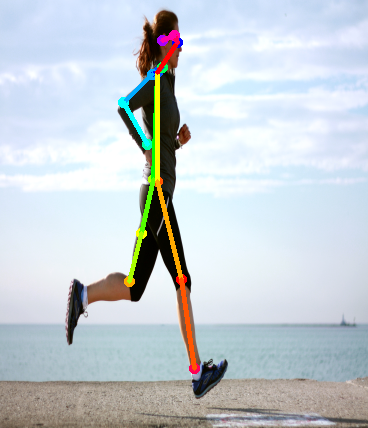

In [31]:

# Getting keypoints from image of trainer using tf_pose and showing the trainer pose

from google.colab.patches import cv2_imshow
humans = e.inference(image,resize_to_default=(w > 0 and h > 0), upsample_size=4.0)
# if not showBG:
#   image = np.zeros(image.shape)
                # Plotting the keypoints and lines to the image
image = TfPoseEstimator.draw_humans(image, humans, imgcopy=False)
npimg = np.copy(image)
image_h, image_w = npimg.shape[:2]
centers = {}
keypoints_list=[]
for human in humans:
          # draw point
        for i in range(common.CocoPart.Background.value):
                if i not in human.body_parts.keys():
                        continue

                body_part = human.body_parts[i]
                x_axis=int(body_part.x * image_w + 0.5)
                y_axis=int(body_part.y * image_h + 0.5)
                center=[x_axis,y_axis]
                centers[i] = center
                keypoints_list.append(centers)
# To display fps

# To display image
cv2_imshow(image)


**Get Postion function part**

In [32]:
#creating dataframe of stored Features of trainer


import pandas as pd
#features=[0]*32
features=[0]*36
#print(features)
keyp_list=[]
#data=pd.Dataframe()
#print(len(keypoints_list[i]))
# Preprocessing of the keypoints data
for i in range(0, len(keypoints_list)):
    k=-2
    for j in range(0,18):
        k=k+2
        try:
            if k>=36:
                break
            #print(k)
            #print(keypoints_list[i][j])
            features[k]=keypoints_list[i][j][0]
            features[k+1]=keypoints_list[i][j][1]
        except:
            features[k]=0
            features[k+1]=0
    #print(features)
    keyp_list.append(features)
#print(keyp_list)
# Getting all the feature column names for intialization of our dataframe.
column_names=[]
for i in range(36):
    column_names.append(str(i))
data=pd.DataFrame(keyp_list,columns=column_names)


In [33]:
data.head()


,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,177,42,157,72,152,74,123,102,147,144,...,194,368,174,35,0,0,162,40,0,0
1,177,42,157,72,152,74,123,102,147,144,...,194,368,174,35,0,0,162,40,0,0
2,177,42,157,72,152,74,123,102,147,144,...,194,368,174,35,0,0,162,40,0,0
3,177,42,157,72,152,74,123,102,147,144,...,194,368,174,35,0,0,162,40,0,0
4,177,42,157,72,152,74,123,102,147,144,...,194,368,174,35,0,0,162,40,0,0


In [34]:
def findCosineSimilarity_1(source_representation, test_representation):
    import numpy as np
    a = np.matmul(np.transpose(source_representation), test_representation)
    b = np.sum(np.multiply(source_representation, source_representation))
    c = np.sum(np.multiply(test_representation, test_representation))
    return 1 - (a / (np.sqrt(b) * np.sqrt(c)))


**Comparison of two imput images poses**

*   image_1 is trainer
*   image_2 is student



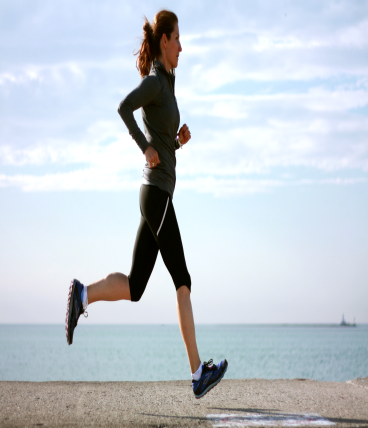

0.08228419882461502


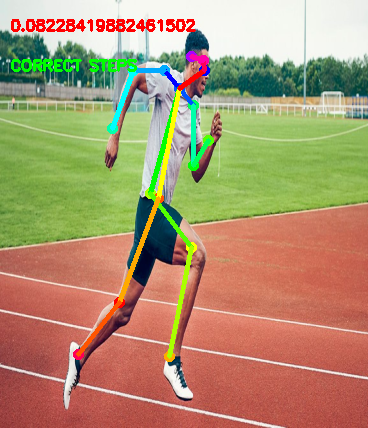

In [35]:

# Two input images comparison of trainer and student



image_1=cv2.imread("/content/running2.jpg")
image_2=cv2.imread("/content/running1.jpg")

image_2 = cv2.resize(image_2, dim, interpolation = cv2.INTER_AREA)
image_1 = cv2.resize(image_1, dim, interpolation = cv2.INTER_AREA)
student_1=e.inference(image_2,resize_to_default=(w > 0 and h > 0),upsample_size=4.0)
trainer_2 = e.inference(image_1, resize_to_default=(w > 0 and h > 0),upsample_size=4.0 )
#Dancer keypoints and normalization
transformer = Normalizer().fit(keyp_list)
keyp_list=transformer.transform(keyp_list)
# Showing FPS
# cv2.putText(image_2, "FPS: %f" % (1.0 / (time.time() - fps_time)), (10, 10),
#             cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
# Displaying the dancer feed.
cv2_imshow( image_2)
# Getting User keypoints, normalization and comparing also plotting the keypoints and lines to the image
image_1 = TfPoseEstimator.draw_humans(image_1, trainer_2, imgcopy=False)
npimg = np.copy(image_1)
image_h, image_w = npimg.shape[:2]
centers = {}
keypoints_list=[]
for human in trainer_2:
              # draw point
        for i in range(common.CocoPart.Background.value):
                    if i not in human.body_parts.keys():
                            continue

                    body_part = human.body_parts[i]
                    x_axis=int(body_part.x * image_w + 0.5)
                    y_axis=int(body_part.y * image_h + 0.5)
                    center=[x_axis,y_axis]
                    centers[i] = center
        k=-2
        features=[0]*36
        for j in range(0,18):
            k=k+2
            try:
                if k>=36:
                    break
                #print(k)
                #print(keypoints_list[i][j])
                features[k]=centers[j][0]
                features[k+1]=centers[j][1]
            except:
                features[k]=0
                features[k+1]=0
        features=transformer.transform([features])
        #print(features[0])
        min_=100 # Intializing a value to get minimum cosine similarity score from the dancer array list with the user
        for j in keyp_list:
            #print(j)
            sim_score=findCosineSimilarity_1(j,features[0])
            #print(sim_score)
            #Getting the minimum Cosine Similarity Score
            if min_>sim_score:
                min_=sim_score
# Displaying the minimum cosine score
cv2.putText(image_1, str(min_), (10, 30),
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)
# If the disctance is below the threshold
print(min_)
if min_<=0.150:
    cv2.putText(image_1, "CORRECT STEPS", (10, 70),
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
else:
    cv2.putText(image_1,  "NOT CORRECT STEPS", (10, 70),
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)
# Display the user feed
cv2_imshow(image_1)
